# <center><u>Train And Test</u></center>

- Dataset Selection for Train And Test
    -  train_test_split
    -  Cross-Validated metrics
    -  K-Fold
    -  ShuffleSplit
- Train And Test Problem:
    - Fitting Problem 
    - Type of Fitting (Under Fitting and Over Fitting)
    - The Bias vs Variance trade-off
    - Regularization
    - Variance
    - Ideal Statement for a Model

## <u>Selection Datasets for Test Train </u>

![](_pic/img-TrainAndTest/Capture.PNG)

### Splitting Datasets

- To use a dataset in Machine Learning, the dataset is first split into a training and test set.
- The Training set is used to train the model
- The test set is used to test the accuracy of the model.
- Typically,split 80%training ,20% test

**Example**

In [11]:
import pandas as pd
df=pd.read_csv('E:\ScriptShef\Dataset\ml-dataset\Supervised\Regression\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
len(df)

30

In [13]:
#feature
X=df.iloc[:,0:1].values   #2d

# target
Y=df.Salary.values    #1d

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=10,random_state=10)

In [29]:
# X_train,y_train
# X_test,y_test

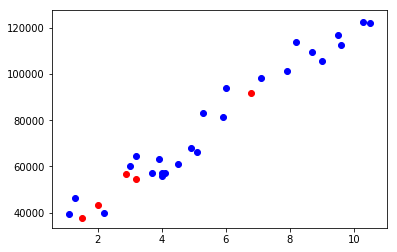

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,c='r')
plt.scatter(X_train,y_train,c='b')
plt.show()

### Type of Splitting of the Dataset

#### 1) Serial Splitting of the Dataset
- Simplest method of splitting data is to split it serially.
- Take first 80% rows and put into training set.
- Take remaining 20% rows and put into test set.

In [35]:
import pandas as pd # pandas library
dataset = pd.read_csv('E:\ScriptShef\Dataset\ml-dataset\Supervised\Regression\Salary_Data.csv') # read in data as panda dataframes

In [36]:
# import matplotlib.pyplot as plt

# X=df.iloc[:,0:1].values   #2d
# y=df.Salary.values    #1d
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10)

# plt.scatter(X_test,y_test,c='r')
# plt.scatter(X_train,y_train,c='b')
# plt.show()

In [37]:
nrows = len(dataset.index) # property shape[ 0 ] is the number of rows

train = dataset.iloc[ 1: int(nrows * .5) , : ]
test = dataset.iloc[int(nrows * .5) +1: nrows, : ]

X_test= test.iloc[:,1]
y_test= test.iloc[:,-1]
X_train=train.iloc[:,1]
y_train=train.iloc[:,-1]

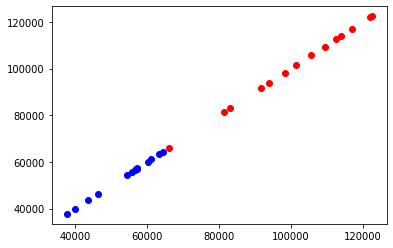

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,c='r')
plt.scatter(X_train,y_train,c='b')
plt.show()

#### 2) Random Splitting of the Dataset
- Another method is too pick rows at random.
- Sci-kit learn has built-in method


In [2]:
import pandas as pd # pandas library
dataset = pd.read_csv("res\Salary_Data.csv") # read in data as panda dataframe
#feature
X=df.iloc[:,0:1].values   #2d
# target
Y=df.Salary.values    #1d

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 0.2 mean's 20%

- test_size = split size
- random_state = seed for random Number generator

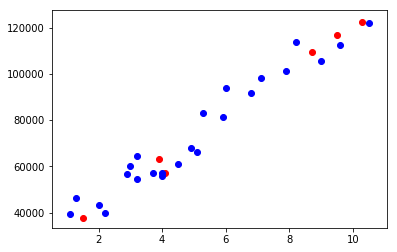

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,c='r')
plt.scatter(X_train,y_train,c='b')
plt.show()

## Data Imbalance - Overfitting
- If the training data is overly **unbalanced**, then the model will predict a non-meaningful result.

-  For example, if the model is a binary classifier (e.g., apple vs. pear), and nearly all the samples are of the same label (e.g., apple), then the model will simply learn that everything is a that label (apple).

- This is called **overfitting**. To prevent overfitting, there needs to be a fairly equal distribution of training samples for each classification, or range if label is a real value.
![](img/img-TrainAndTest/overFitting.PNG)

## Cross Validation
In train_test_split,testing data is never used in training,and this testing data might effect performance of model so cross validation uses multiple folds to check model performance (each fold has different testing data set)and returns performance of each fold.Bydefault it uses 3 folds, but generally we should 10 folds or based on datasize,hence K-fold.

![](_pic/img-TrainAndTest/CrossValidation.PNG)

### K-Fold is a well-known form of cross validation.
-  Steps:
    1. Partition the dataset into k equal sized partitions.
    2. Select one partition as the validation data.
    3. Use the remaining k-1 as the training data.
    4. Train the model and determine accuracy fromthe validation data.
    5. Repeat the process k times, selecting a different partition each time for the validation data.
    6. Average the accuracy results.
    
#### Computing cross-validated metrics
![](_pic/img-TrainAndTest/grid_search_cross_validation.png)
    
**Code**
- From sklearn.model_selection import cross_val_score
- 1darray=cross_val_score(model,X,y,cv=10)
    
**We may use cross validation in:**
- parameter tuning
- fetaures selection
- model selection

In [55]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
     print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [79]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

**train_test_split**

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)  

0.9666666666666667

**cross_val_score**

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [82]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


In [83]:
from sklearn import metrics
scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
scores  

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

**ShuffleSplit**

In [84]:
 from sklearn.model_selection import ShuffleSplit
n_samples = iris.data.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

**Manuals**

In [54]:
def custom_cv_2folds(X):
     n = X.shape[0]
     i = 1
     while i <= 2:
         idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
         yield idx, idx
         i += 1
        
custom_cv = custom_cv_2folds(iris.data)
cross_val_score(clf, iris.data, iris.target, cv=custom_cv)

array([1.        , 0.97333333])

## <u>Fitting(Train And Test Problem)</u>
![](_pic/img-TrainAndTest/Fitting.png)
### 1) Underfitting:
We train the model with given traing data set and model is not performning well if we test this model with same dataset.
- Ex: A player does not perform well on the same playground where he was trained.

### 2) Overfitting:
We train the model with given traing data set and model is performning well if we test this model with same dataset but not performing well with different(unseen) dataset.
- Ex: A player performs well on the same playground where he was trained but does not perform well on other playground.

### The Bias vs Variance trade-off:
**1) Bias** refers to the error due to the model’s simplistic assumptions in
fitting the data. A high bias means that the model is unable to capture the
patterns in the data and this results in under-fitting.

**2) Variance** refers to the error due to the complex model trying to fit the
data. High variance means the model passes through most of the data
points and it results in the data.

![](_pic/img-TrainAndTest/bias1.png)

- high bias--->Underfitting
- unbias------>Overfitting

### Regularization:
- it solves overfitting problem by adding some bias(penalty) in model and also reduces coef.
- Ridge & Lasso are two techniques for regulerization:-
    - 1.Ridge(a.k.a. L2)
    - 2.Lasso(a.k.a L1)

### Variance:
variability(spread) of prediction of testing sample over different subset of a dataset. 
- we should try to keep low variance

**Ideal Statement for a Model:** low bias and low variance



**Overfitting Underfitting (Program):**

In [1]:
import pandas as pd
df=pd.read_csv('res/Position_Salaries.csv')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values
print(df.index)
df

RangeIndex(start=0, stop=10, step=1)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
pred=lr.predict(X)

In [12]:
from sklearn.metrics import r2_score
r2_score(y,pred)

0.6690412331929895

In [13]:
X_train=X[:6,:]
y_train=y[:6]

In [14]:
X_test=X[6:,:]
y_test=y[6:]

In [15]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
pred_train=lr.predict(X_train)
#X_train.shape  (6, 1)
r2_score(y_train,pred_train)   #Train Score

0.9060547295841413

In [17]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
X_train_poly=pf.fit_transform(X_train)
X_train_poly

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [18]:
lr.fit(X_train_poly,y_train)          # Train on  train Dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
pred_train_poly=lr.predict(X_train_poly)
r2_score(y_train,pred_train_poly)      #train R2 Score

0.9994613229907348

In [22]:
X_test_poly=pf.transform(X_test)
pred_test_poly=lr.predict(X_test_poly)
r2_score(y_test,pred_test_poly)        #test R2 Score

-0.0490972408700332

**Very Bad R2_Score** : r2_score(y_test,pred_test_poly)   -->   -0.0490972408700332

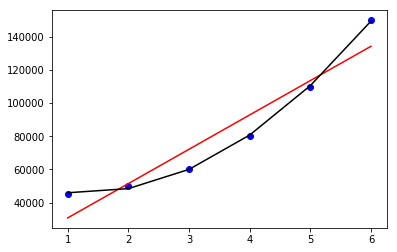

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,c='b')
plt.plot(X_train,pred_train,c='r')
plt.plot(X_train,pred_train_poly,c='k')
plt.show()

**Ridge(a.k.a. L2) Method** 

In [75]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=.005)
rd.fit(X_train,y_train)

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
pred_train_ridge=rd.predict(X_train)

In [79]:
pred_test_ridge=rd.predict(X_test)

In [80]:
r2_score(y_train,pred_train_ridge)

0.9060546556627368

In [81]:
r2_score(y_test,pred_test_ridge)

-0.9015297766783505

**Lasso(a.k.a L1) Method:**

In [82]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train_poly,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
pred_train_ls=ls.predict(X_train_poly)

In [84]:
pred_test_ls=ls.predict(X_test_poly)

In [85]:
r2_score(y_train,pred_train_ls)

0.9994612828810403

In [86]:
r2_score(y_test,pred_test_ls)

-0.04952837170612745